In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [60]:
# read data
train_df = pd.read_csv('./input/titanic/train.csv')
test_df = pd.read_csv('./input/titanic/test.csv')

train_df.shape, test_df.shape

In [5]:
# check data informations
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info() # check null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


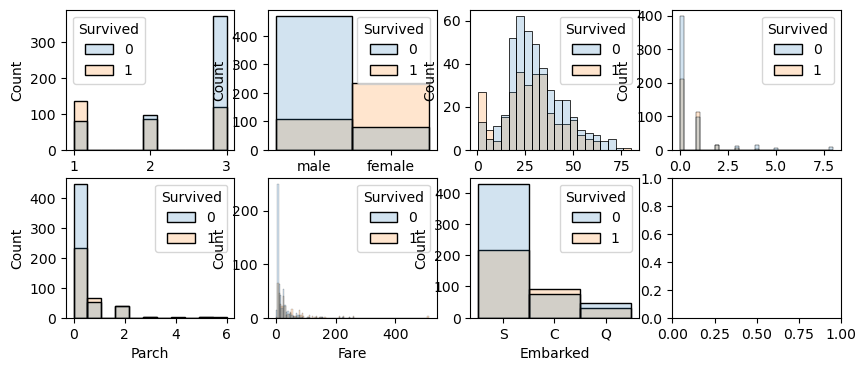

In [8]:
# 그래프로 데이터 살피기
fig, ax = plt.subplots(2,4,figsize=(10,4))
ax = ax.flatten()
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

for i, col in enumerate(columns):
    sns.histplot(data=train_df, x=col, hue='Survived', ax=ax[i], alpha=0.2)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

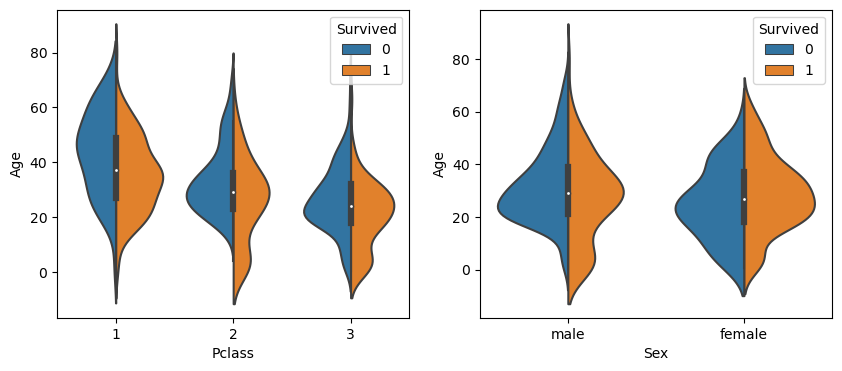

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, ax=ax[1])

In [10]:
# 결측값 처리(Name으로 Age 결측값 처리)
train_df['checkName'] = train_df['Name'].str.extract('([A-Za-z]+)\.')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,checkName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
pd.crosstab(train_df.checkName, train_df.Sex).T.style.background_gradient(cmap='coolwarm')

checkName,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [12]:
train_df['checkName'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady',
                               'Major','Mlle','Mme','Ms','Rev','Sir'],
                             ['Mr','Other','Mrs','Mr','Mr','Other','Mrs',
                              'Mr','Miss','Miss','Miss','Other','Mr'],inplace=True)
train_df.groupby('checkName')['Age'].mean()

checkName
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [13]:
checkName_li = ['Master','Miss','Mr','Mrs','Other']
checkAge_li = [5,22,33,36,46]

for i in range(len(checkName_li)):
    train_df.loc[(train_df['Age'].isnull())&
              (train_df['checkName']==checkName_li[i]),'Age'] = checkAge_li[i]

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  checkName    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [15]:
# 결측값 처리(Embarked column 최빈값으로 대체)
train_df.groupby('Sex')['Embarked'].agg(**{'most_common_v':lambda x:x.mode()})

,most_common_v
Sex,
female,S
male,S


In [16]:
train_df['Embarked'].fillna('S', inplace=True)

In [17]:
train_df.info() # Cabin은 ML에 안 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  checkName    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [19]:
# 범주형변수로 바꾸기(Age)
train_df['AgeBind'] = train_df['Age'].apply(lambda x: 1 if x<=15 else 1)
train_df.loc[(train_df['Age']>30)&(train_df['Age']<=50),'AgeBind'] = 2
train_df.loc[(train_df['Age']>50)&(train_df['Age']<=65),'AgeBind'] = 3
train_df.loc[train_df['Age']>65,'AgeBind'] = 4

In [20]:
# 범주형변수로 바꾸기(Fare)
train_df['FareBind'] = pd.qcut(train_df['Fare'],4)
train_df.groupby(['FareBind'])['Survived'].mean().to_frame().style.background_gradient(cmap='coolwarm')

,Survived
FareBind,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [24]:
train_df['FareBind'] = 0
train_df.loc[train_df['Fare']<=7.91, 'FareBind'] = 0
train_df.loc[(train_df['Fare']>7.91)&(train_df['Fare']<=14.454), 'FareBind'] = 1
train_df.loc[(train_df['Fare']>14.454)&(train_df['Fare']<=31), 'FareBind'] = 2
train_df.loc[(train_df['Fare']>31)&(train_df['Fare']<=512.329), 'FareBind'] = 3

In [25]:
# 동승객 여부
train_df['FellowP'] = train_df['Parch'] + train_df['SibSp']

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  checkName    891 non-null    object 
 13  AgeBind      891 non-null    int64  
 14  FareBind     891 non-null    int64  
 15  FellowP      891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


In [28]:
# 문자범주형변수를 숫자범주형으로 mapping
train_df['Sex'].replace(['male','female'],[0,1], inplace=True)
train_df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
train_df['checkName'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

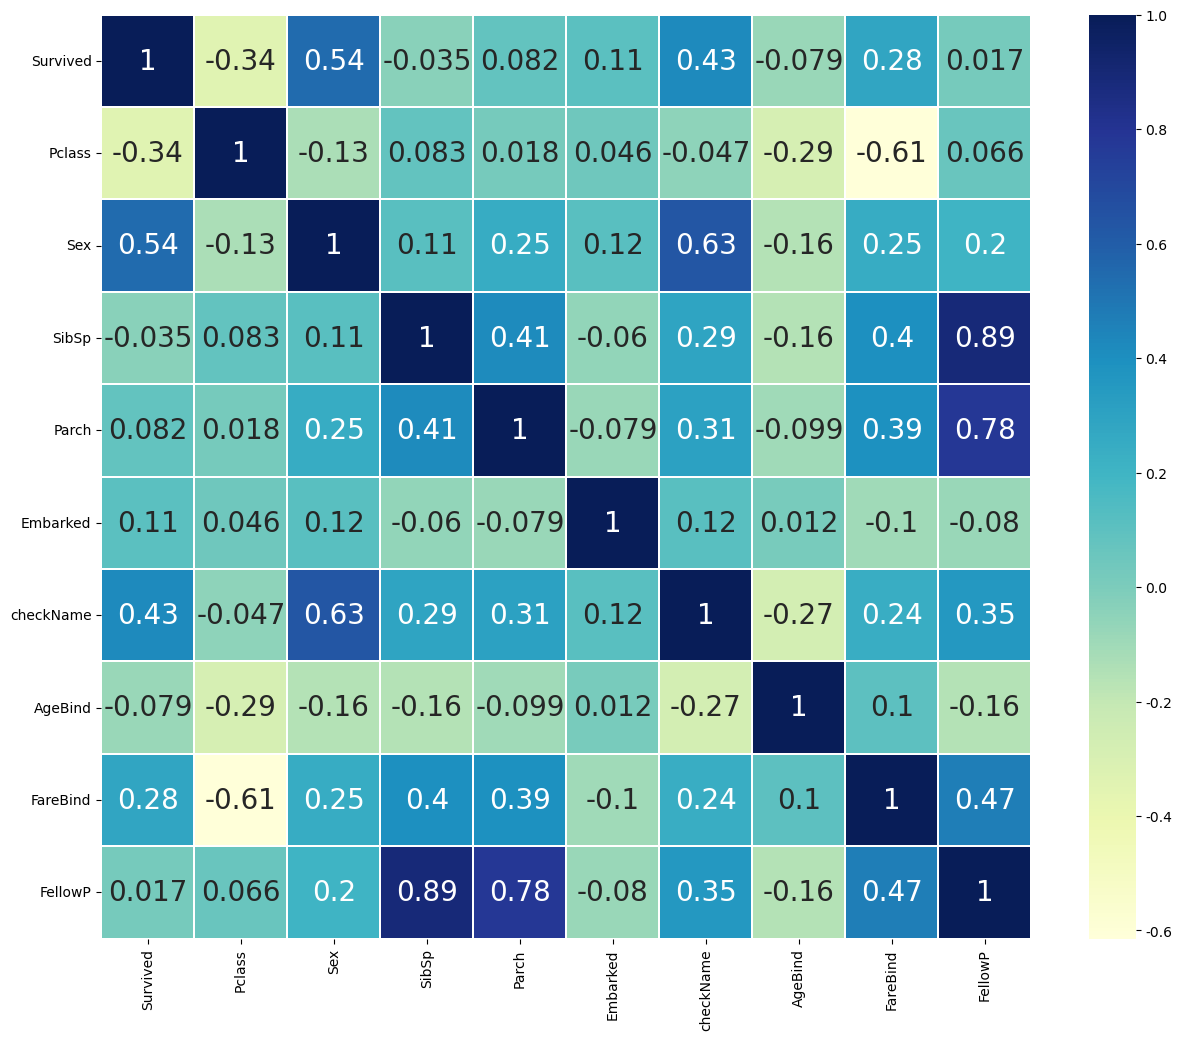

In [40]:
# 무의미한 데이터 삭제
train_df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1, inplace=True)
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.1, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [ ]:
# start ML

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold # 교차검증

from sklearn.model_selection import cross_val_score # 정확도측정

In [48]:
learning_df = train_df['Survived']
train_df = train_df.drop('Survived', axis=1)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'
score = {}

In [49]:
# LogisticRegression
model = LogisticRegression()
score['LogisticRegression'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
score['DecisionTreeClassifier'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

# SVC
model = SVC()
score['SVC'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

# RandomForestClassifier
model = RandomForestClassifier(n_estimators=13)
score['RandomForestClassifier'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=13)
score['KNeighborsClassifier'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

# GaussianNB
model = GaussianNB()
score['GaussianNB'] = cross_val_score(model, train_df, learning_df, cv=k_fold, n_jobs=1, scoring=scoring)

In [51]:
# 교차검증 평균 정확도%
for k,v in score.items():
    print(k,':',round(np.mean(v)*100,2))
    
# SVM이 제일 높으므로 SVM으로 테스트

LogisticRegression : 79.69
DecisionTreeClassifier : 81.14
SVC : 82.49
RandomForestClassifier : 80.92
KNeighborsClassifier : 81.25
GaussianNB : 79.35


In [75]:
# before test
# test_df.info() # Age, Fare, Cabin null
test_df['checkName'] = test_df['Name'].str.extract('([A-Za-z]+)\.')
# pd.crosstab(train_df.checkName, train_df.Sex).T.style.background_gradient(cmap='coolwarm')
test_df['checkName'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady',
                               'Major','Mlle','Mme','Ms','Rev','Sir','Dona'],
                             ['Mr','Other','Mrs','Mr','Mr','Other','Mrs',
                              'Mr','Miss','Miss','Miss','Other','Mr','Miss'],inplace=True)
test_df.groupby('checkName')['Age'].mean()
checkName_li = ['Master','Miss','Mr','Mrs','Other']
checkAge_li = [5,22,33,36,46]
for i in range(len(checkName_li)):
    test_df.loc[(test_df['Age'].isnull())&
              (test_df['checkName']==checkName_li[i]),'Age'] = checkAge_li[i]

test_df['AgeBind'] = test_df['Age'].apply(lambda x: 1 if x<=15 else 1)
test_df.loc[(test_df['Age']>30)&(test_df['Age']<=50),'AgeBind'] = 2
test_df.loc[(test_df['Age']>50)&(test_df['Age']<=65),'AgeBind'] = 3
test_df.loc[test_df['Age']>65,'AgeBind'] = 4

test_df['FareBind'] = 0
test_df.loc[test_df['Fare']<=7.91, 'FareBind'] = 0
test_df.loc[(test_df['Fare']>7.91)&(test_df['Fare']<=14.454), 'FareBind'] = 1
test_df.loc[(test_df['Fare']>14.454)&(test_df['Fare']<=31), 'FareBind'] = 2
test_df.loc[(test_df['Fare']>31)&(test_df['Fare']<=512.329), 'FareBind'] = 3

test_df['FellowP'] = test_df['Parch'] + test_df['SibSp']

test_df['Sex'].replace(['male','female'],[0,1], inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
test_df['checkName'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

test = test_df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1).copy()

In [76]:
# start test
test_model = SVC()
test_model.fit(train_df, learning_df)

prediction = test_model.predict(test)

In [77]:
import collections
collections.Counter(prediction)
# 사망 254명, todwhs: 164명

Counter({0: 254, 1: 164})

In [79]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],
                          'Survived':prediction})
ver = 2
submission.to_csv('./output/submission_titanic_{}.csv'.format(ver), index = False)

In [80]:
submission_df = pd.read_csv('submission.csv')
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
